<img src='logo_DH.png' align='center' width=35%/>

<h1 style="text-align: center;">Desafío Final - Predicción de Churn - Telecom</h1>

<a id="section_toc"></a> 
## Tabla de Contenidos

[Introducción y objetivos](#section_intro)

[Importación de librerías y confguración de display()](#section_importacion)

[Importación del archivo properati](#section_properati)

[Inspección de la tabla sin limpieza previa](#section_inspeccion)

[Creación de función general para el análisis de columnas y sus valores](#section_creacion_de_funcion)

$\hspace{.5cm}$[Funcion my_info_columnas()](#section_funcion_1)
  
$\hspace{.5cm}$[Funcion my_colmnas_valores()](#section_funcion_2)

[Eliminacion de columnas redundantes](#section_eliminacion)


[Análisis de las variables más importantes](#section_analisis_var)

[Imputacion de valores faltante por medio de otro campo o estadístico de grupo](#section_imputacion)

[Diagrama de expensas para los valores existentes](#section_expensas)

[Gráficos variables categóricas](#section_categorizacion)

[Gráficos variables contínua](#section_graficos)

[Archivo para desafío 2](#section_desafio_2)

---
<a id="section_intro"></a> 
## Introducción y objetivos

[volver a TOC](#section_toc)


#### Resumen
El objetivo del desafío consiste en predecir si un cliente se va o no de una empresa de servicio de telecomunicaciones, en este caso Telecom. Es decir, estaremos realizando una predicción de Churn (deserción/abandono del servicio).

Se trabajará sobre un conjunto de datos, **"telecom_users"**, de una empresa de telecomunicaciones. La misma tiene información sobre casi seis mil usuarios, sus características demográficas, los servicios que utilizan, la duración del uso de los servicios del operador, la forma de pago y el monto del pago.

La tarea consiste en analizar los datos y predecir la deserción de usuarios (para identificar a las personas que renovarán y no renovarán su contrato), creando así un modelo de aprendizaje supervisado (clasificador), que sirva de soporte a las áreas de la empresa para que puedan implementar diferentes estrategias de retención.

Se planteará los siguientes puntos para lograr el objetivo:

- Descripción de los datos.
- Investigación de dependencias y formulación de hipótesis.
- Construir modelos para predecir el flujo de salida (con justificación para la elección de un modelo en particular) basados en hipótesis probadas y relaciones identificadas.
- Comparación de la calidad de los modelos obtenidos.

#### Dataset
El dataset cuenta con 5.986 registros y 22 columnas. Explicamos el significado de las mismas:

- customerID - ID del cliente
- gender - Genero del cliente (male / female)
- SeniorCitizen - Jubilado (1, 0)
- Partner - Casado (Yes, No)
- Dependents - Hijos (Yes, No)
- tenure - Antiguedad del cliente en meses.
- PhoneService - Servicio de telefonía (Yes, No)
- MultipleLines - Multiple lineas telefónicas (Yes, No, No phone service)
- InternetService - Tipo de servicio de Internet (DSL, Fiber optic, No)
- OnlineSecurity - Servicio de antivirus (Yes, No, No internet service)
- OnlineBackup - Servicio de backup (Yes, No, No internet service)
- DeviceProtection - Seguro de equipo (Yes, No, No internet service)
- TechSupport - Servicio de soporte técnico (Yes, No, No internet service)
- StreamingTV - Servicio de TV (Yes, No, No internet service)
- StreamingMovies - Servicio de películas (Yes, No, No internet service)
- Contract - Duración del contrato (Month-to-month, One year, Two year)
- PaperlessBilling - Facturación electrónica (Yes, No)
- PaymentMethod - Método de pago (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges - Monto de pago mensual actual
- TotalCharges - Monto total de pagos realizados
- Churn - Baja de servicio (Yes or No)

#### Detalle del problema
##### **¿Qué es el Churn Rate y por qué es importante para una empresa?**

<img src='imagen_churn_0.png' align='left' width=25%/>
<br clear="left"> 

Cualquier empresa quiere maximizar el número de clientes. Para lograr este objetivo, es importante no solo tratar de atraer nuevos, sino también **retener los existentes**. Retener a un cliente le costará a la empresa menos que atraer uno nuevo. Generalmente cuesta cinco veces más atraer a un nuevo cliente que mantener uno existente! Además, un nuevo cliente puede estar débilmente interesado en los servicios y será difícil trabajar con él, mientras que los antiguos clientes ya tienen experiencia sobre la interacción con el servicio y se pueden aplicar diferentes herramientas sobre la retención del mismo.

En consecuencia, prediciendo el Churn (propensión a la baja), podemos reaccionar a tiempo y tratar de retener al cliente que quiere irse. En base a los datos sobre los servicios que utiliza el cliente, podemos hacerle una oferta especial, una determinada promoción o algún otro tipo de retención, intentando cambiar su decisión de dejar el servicio. Esto hará que la tarea de retención sea más fácil de implementar que la tarea de atraer nuevos usuarios, de los que aún no sabemos nada, y ademas los costos son menores.


##### **Churn Rate**

Se trata de la tasa que te indica la cantidad de suscriptores que ha perdido la empresa en un periodo concreto. Se utiliza para a determinar si las estrategias de mercado llevadas a cabo están siendo bien direccionadas o no. Lo más importante es utilizarlo para **poder focalizarse en buscar el por qué la tasa de cancelación de los suscriptores ha aumentado**.

<img src='imagen_churn_1.png' align='left' width=25%/>
<br clear="left"> 

Cuanto más pequeño sea este porcentaje, menor serán los consumidores que se hayan dado de baja a lo largo del periodo. Algunos números de ejemplo:

- Las compañías de telefonía móvil tienen un Churn Rate entre un 20% y un 38%.
- Las empresas de telecomunicaciones estadounidenses más competitivas tienen un Chrun Rate sobre un 1%.

Es importante mencionar también que mediante este cálculo además de saber cuántos seguidores tienes al comienzo del periodo y al final del periodo, se puede detectar cuál ha sido el patrón, es decir, en qué época se han dado los mayores abandonos y poder entender por qué.

##### **Motivos y estrategias para reducir el Churn**

Algunos de los motivos más comunes que producen el aumento del Churn:

- El precio: Es la objeción más común por la cual un cliente se va. Ocurre cuando un cliente puede encontrar otros proveedores que ofrecen el mismo producto o servicio, por un precio más bajo. 

- Ajustes en el mercado y el producto: si un ajuste entre el producto y el mercado es insuficiente, las ventas y el servicio al cliente deben alinearse. Cuando el vendedor se centra en alcanzar la cuota y deja de lado las ventas a clientes ajustados al producto, entonces la compra se cancelará en poco tiempo. Lo mismo ocurre cuando el cliente entiende que la solución ofrecida no da resultado.

- Experiencia de usuario: si el usuario presenta problemas con la experiencia a través de los sitios web o aplicaciones, va a dejar de hacer uso de las mismas.

- Experiencia de cliente: Cuando un cliente recibe una atención poco o nada positiva a través de diversos canales como redes sociales, soporte técnico o cualquier otro.


Algunas de las estrategias para reducir el Churn Rate:

- Identificar bien a los clientes: los consumidores se dan de alta en una plataforma porque ven una oferta de algún producto o servicio que les interesa mucho. Para que no se den de baja, esta percepción de satisfacer las necesidades a los clientes tiene que perdurar. Si no es así, buscarán entre los competidores del mismo sector el producto, dándose de baja del tuyo. Por lo tanto, es muy importante crear un valor añadido en comparación con los competidores y innovar. 

-  Mejorar las ofertas: el cliente que se suscribe en una empresa es porque espera una calidad de producto determinado. Cuando el cliente se da de alta en una plataforma está dando su confianza a esa empresa. Por tanto, la empresa debe ofrecer siempre lo mejor para ellos. Como estrategia, siempre hay que ofrecer lo mejor a tu cliente y a la mejor calidad. Para que sientan que lo que reciben no van a recibirlo en ninguna de las otras empresas. 

- Realizar una buena segmentación: tener claro cual es tu consumidor clave, al que quieres vender tu producto o lo que ofreces, tener los grupos de interés bien identificados y crear estrategias específicas para poder atraerlos. 

- Identificar las causas de la baja: estudiar los efectos positivos o negativos que hayan ocasionado para poder mejorar y/o crear nuevas campañas publicitarias.

- Mejorar el servicio o producto que se ofrece: para que no pierdan el interés y continúen suscritos. Hay que dar una imagen profesional y hacer ver que sí hay una preocupación y una constante mejora para el bienestar de los consumidores.

- Explotar tu marca para aportar valor añadido: es el valor añadido ante sus competidores. Si la empresa cumple con las expectativas, ofrece un producto y/o servicio especial los clientes estarán satisfechos. Una innovación constante puede ayudar a ello. Es importante también escuchar a los suscriptores, preocuparse por los aspectos que ellos ven a mejorar, puede dar una pista de qué dirección tomar.

- Fidelizar clientes: si existe una comunicación constante con el cliente, y este ve que su opinión se toma en cuenta y ve mejoras constantemente, la satisfacción será grande evitando que los suscriptores no quieran darse de baja.

En conclusión, es el Churn Rate es un muy importante para las empresas hoy en día. Para poder ver esos puntos débiles en los que el negocio falla y poder mejorar. Lo más importante es que se de un cambio constante y escuchar las propuestas de aquellas personas que ya estén suscritas al servicio.

---
<a id="section_importacion"></a> 
## Importación de librerías y configuración de display()

[volver a TOC](#section_toc)


En esta parte importamos las librerías que usamos y cambiamos la configuración para tener un display/print correctos/útiles

In [128]:
# Importación de librerias:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import re

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn import linear_model

import statsmodels.api as sm
import random

Para cambiar la visualización de los resultados de las celdas (display) modifique las siguientes sentencias, según convenga:

In [129]:
# Configuraciones de display:
pd.set_option("display.max_columns", 50)   # Limita la visualización a max 50 columnas. Si se excede genera "...". NO existe display.min_columns
#pd.set_option("display.max_rows", 20)      # Limita la visualización a max 20 columnas. Si se excede genera "..."
#pd.set_option("display.min_rows", 10)      # Una vez que display.max_rows se excede, la display.min_rows determina cuántas filas se muestran.
##pd.reset_option("^display")               # Este comando resetea todas las opciones por defecto.

---
<a id="section_properati"></a> 
## Importación del archivo "telecom_users.csv"

[volver a TOC](#section_toc)

In [130]:
# Importación del archivo "telecom_users":
data = pd.read_csv("telecom_users.csv", sep=",", low_memory=False) # low_memory=False es para que lea el archivo con la mayor cantidad de memoria dsponible y no infiera "mal" un tipo de dato.

In [131]:
# Muestra de la tabla:
data.sample(5)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5097,1077,4361-BKAXE,Female,0,No,No,41,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),114.50,4527.45,Yes
4275,3387,3530-CRZSB,Female,0,No,No,7,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.65,155.9,No
1607,3049,0268-QKIWO,Female,0,No,No,3,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.75,58.85,Yes
4596,774,2037-XJFUP,Male,0,Yes,No,33,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,One year,Yes,Electronic check,95.80,3036.75,Yes
2672,5953,6888-SBYAI,Male,0,No,No,1,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.70,50.7,No


---
<a id="section_inspeccion"></a> 
## Inspección de la tabla y limpieza

[volver a TOC](#section_toc)

Se realiza un análisis básico para entender los datos e información que almacena la tabla.

<a id="descripción"></a> 
#### Descripción, tipos de datos y valores nulos

[volver a TOC](#section_toc)

In [132]:
# Dimensiones:

print("Dimensiones de la tabla: ", data.shape)

Dimensiones de la tabla:  (5986, 22)


In [133]:
# Información del dataset:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [134]:
# Vemos que SeniorCitizen es correctamente un int pero nos conviene usarlo como categórica object.
# Vemos que TotalCharges debería ser numérica y es object.

data.SeniorCitizen = data.SeniorCitizen.astype('object')              # Nos conviene utilizarlo como categórica.
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce') # Los que al parsearlo no sean numérico, los llena con NaN.

In [135]:
# Veamos ahora como quedaron:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   object 
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [136]:
# Vemos que tenemos valores nulos en TotalCharges que antes no teníamos, surgieron por la conversión a numérico, veamos que tienen:

data[data.TotalCharges.isnull()]

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
634,1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
2771,3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
3086,5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
3255,3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
4326,936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
5375,753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5382,4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5695,488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
5951,1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No


In [137]:
# Vemos que coinciden con que la antiguedad es 0 (tenure=0). 
# Los eliminamos:

data.dropna(inplace=True)
print("Dimensiones de la tabla sin nulos: ", data.shape)
data = data.reset_index(drop=True)                          # Reseteo índex del df porque borré filas.
data.info()

Dimensiones de la tabla sin nulos:  (5976, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976 entries, 0 to 5975
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5976 non-null   int64  
 1   customerID        5976 non-null   object 
 2   gender            5976 non-null   object 
 3   SeniorCitizen     5976 non-null   object 
 4   Partner           5976 non-null   object 
 5   Dependents        5976 non-null   object 
 6   tenure            5976 non-null   int64  
 7   PhoneService      5976 non-null   object 
 8   MultipleLines     5976 non-null   object 
 9   InternetService   5976 non-null   object 
 10  OnlineSecurity    5976 non-null   object 
 11  OnlineBackup      5976 non-null   object 
 12  DeviceProtection  5976 non-null   object 
 13  TechSupport       5976 non-null   object 
 14  StreamingTV       5976 non-null   object 
 15  StreamingMovies   5976 non-null   object 


Ver que no tenemos más nulos ni tipos de datos incorrectos.

In [138]:
# Para evitar inconvenientes en el análisis pasamos todos los strings a uppercase():

data = data.applymap(lambda x: x.upper() if type(x) == str else x)
display(data.sample(5))

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1136,6877,4501-EQDRN,FEMALE,0,NO,NO,1,YES,NO,FIBER OPTIC,NO,NO,NO,NO,NO,NO,MONTH-TO-MONTH,NO,BANK TRANSFER (AUTOMATIC),69.70,69.70,YES
2595,6495,7254-IQWOZ,MALE,0,NO,NO,1,YES,NO,FIBER OPTIC,NO,NO,NO,NO,NO,NO,MONTH-TO-MONTH,YES,ELECTRONIC CHECK,69.65,69.65,YES
1512,4633,1820-DJFPH,FEMALE,0,YES,YES,72,YES,YES,NO,NO INTERNET SERVICE,NO INTERNET SERVICE,NO INTERNET SERVICE,NO INTERNET SERVICE,NO INTERNET SERVICE,NO INTERNET SERVICE,TWO YEAR,YES,BANK TRANSFER (AUTOMATIC),24.05,1709.15,NO
4680,1990,4514-GFCFI,FEMALE,1,NO,NO,16,YES,YES,FIBER OPTIC,NO,NO,NO,NO,YES,NO,MONTH-TO-MONTH,YES,ELECTRONIC CHECK,84.75,1350.15,YES
1716,6837,6229-LSCKB,MALE,1,NO,NO,6,YES,NO,FIBER OPTIC,NO,NO,NO,NO,YES,NO,MONTH-TO-MONTH,YES,ELECTRONIC CHECK,79.70,497.60,NO
639,418,0578-SKVMF,FEMALE,0,YES,YES,22,YES,NO,FIBER OPTIC,NO,YES,NO,NO,NO,YES,MONTH-TO-MONTH,NO,ELECTRONIC CHECK,83.30,1845.90,YES
1955,5828,0402-OAMEN,FEMALE,0,YES,YES,72,YES,YES,NO,NO INTERNET SERVICE,NO INTERNET SERVICE,NO INTERNET SERVICE,NO INTERNET SERVICE,NO INTERNET SERVICE,NO INTERNET SERVICE,TWO YEAR,NO,BANK TRANSFER (AUTOMATIC),24.45,1709.10,NO
4848,4429,3486-HOOGQ,FEMALE,0,YES,YES,70,YES,YES,DSL,YES,YES,YES,YES,YES,NO,TWO YEAR,NO,BANK TRANSFER (AUTOMATIC),79.70,5743.30,NO
938,6878,2990-HWIML,FEMALE,0,NO,NO,6,YES,NO,FIBER OPTIC,NO,NO,NO,NO,YES,YES,MONTH-TO-MONTH,YES,ELECTRONIC CHECK,89.50,573.30,YES
2061,6478,9330-VOFSZ,FEMALE,0,YES,NO,60,YES,YES,FIBER OPTIC,NO,YES,YES,YES,YES,YES,TWO YEAR,YES,CREDIT CARD (AUTOMATIC),110.80,6640.70,NO


In [139]:
# De las columnas numéricas podemos obtener ciertas estadísticas, excluyendo los valores NaN:
data.describe().round(2)

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5976.00,5976.00,5976.00,5976.00,5976.00
mean,3534.77,0.16,32.52,64.85,2298.06
std,2035.41,0.37,24.50,30.11,2274.13
min,0.00,0.00,1.00,18.25,18.80
25%,1779.75,0.00,9.00,35.75,404.31
50%,3548.00,0.00,29.00,70.43,1412.15
75%,5293.50,0.00,56.00,89.90,3846.96
max,7042.00,1.00,72.00,118.75,8684.80


In [140]:
# De las columnas NO numéricas (categóricas) podemos obtener ciertas estadísticas también:
data.describe(include=['object', 'bool'])      # Se especifica el tipo de dato a analizar.

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976
unique,5976,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,2133-TSRRM,MALE,NO,NO,YES,NO,FIBER OPTIC,NO,NO,NO,NO,NO,NO,MONTH-TO-MONTH,YES,ELECTRONIC CHECK,NO
freq,1,3044,3080,4195,5388,2843,2627,2982,2604,2639,2959,2388,2353,3269,3525,2006,4389


---
<a id="section_analisis_de_columnas_y_sus_valores"></a> 
## Análisis de columnas y sus valores

[volver a TOC](#section_toc)

Creamos una función que nos permite analizar rápidamente las columnas (valores nulos y no nulos) y otra que nos permte analizar los valores dentro de esa columna (value_counts)

<a id="section_funcion_1"></a> 
#### Función my_info_columnas()

[volver a TOC](#section_toc)

In [141]:
# Creamos una función que nos devuelve info de sus columnas. Recibe el dataframe y un argumento que indica si analizamos solo las columnas con algún valor NaN o todas.

def my_info_columnas(data, solo_nan='si'):
    data_null = data.isnull().sum()                                                                               # Df de elementos nulos.
    data_null_porc = (100*data_null/len(data)).round(2)                                                           # Df de elementos nulos %.
    data_null_concat = pd.concat([data_null, data_null_porc], axis=1)                                             # Concatena los df anteriores.
    data_null_ok = data_null_concat.rename(columns = {0 : 'Cantidad de NaN', 1 : '% de NaN'})                     # Renombra las columnas del df anterior.
    data_null_ok['Dtype'] = data.dtypes                                                                           # Pego el tipo de dato al df anterior.
    
    dict_unique_size = {}                                                                                         # Creao diccionario vacio.
    for col in data:                                                                                              # Quiero pegarle los valores únicos de cada columna.
        dict_unique_size[col] = data[col].unique().size                                                           # key = nombre de col, values = cant de unicos.
    
    serie_unique_size = pd.Series(dict_unique_size)                                                               # Convierto del diccionario a serie.
    data_null_ok['Valores Unicos'] = serie_unique_size                                                            # Lo agrego como otra columna.

    if solo_nan == 'si':                                                                                           # Creo if para ver si analizo todas las columnas o solo las NaN.
        data_null_ok = data_null_ok[data_null_ok.iloc[:,0] != 0].sort_values('% de NaN', ascending=False)          # Filtra y ordeno las columnas con algún NaN.
    else:
         data_null_ok = data_null_ok.sort_values(by = ['% de NaN','Cantidad de NaN'] , ascending = [False, False]) # Filtra y ordeno las columnas con algún NaN.
    
    print("Tu dataframe tiene:")
    print(str((data.isnull().sum().sum()/data.size*100).round(2)) + "% de valores NaN en total.")
    print(str(data.shape[0]) + " filas")
    
    if solo_nan == 'si':
        print(str(data.shape[1]) + " columnas de las cuales " + str(data_null_ok.shape[0]) + " tienen valores NaN:")
    else:
        print(str(data.shape[1]) + " columnas:")

    display(data_null_ok)
    return

In [142]:
# Analizo las SOLO las columnas que tienen NaN:
my_info_columnas(data, solo_nan='si')      # Llamamos a nuestra función.

Tu dataframe tiene:
0.0% de valores NaN en total.
5976 filas
22 columnas de las cuales 0 tienen valores NaN:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos


In [143]:
# Analizo las TODAS las columnas que tienen NaN:
my_info_columnas(data, solo_nan='no')      # Llamamos a nuestra función.

Tu dataframe tiene:
0.0% de valores NaN en total.
5976 filas
22 columnas:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
Unnamed: 0,0,0.0,int64,5976
customerID,0,0.0,object,5976
gender,0,0.0,object,2
SeniorCitizen,0,0.0,int64,2
Partner,0,0.0,object,2
Dependents,0,0.0,object,2
tenure,0,0.0,int64,72
PhoneService,0,0.0,object,2
MultipleLines,0,0.0,object,3
InternetService,0,0.0,object,3


Vemos que no tenemos duplicados en el customerID.

<a id="section_funcion_2"></a> 
#### Función my_columna_valores()

[volver a TOC](#section_toc)

In [144]:
# Creamos una función para analizar los valores de las diferentes columnas:

def my_columna_valores(data, col='todas'):            # Recibe el df y la columna a analizar.
    if col =='todas':
        for col in data:
            print("\nColumna: " + col + " ----------------------------------------------------\n")
            print("Cantidad de elementos únicos: ", data[col].unique().size)
            print(data[col].value_counts(dropna=False))
    else:
        print("Columna: " + col)
        print("Cantidad de elementos únicos: ", data[col].unique().size)
        print(data[col].value_counts(dropna=False))
    return

In [145]:
# Analizo los valores de SOLO las columnas seleccionada:
my_columna_valores(data, col='StreamingTV')  # Llamamos a nuestra función.

Columna: StreamingTV
Cantidad de elementos únicos:  3
NO                     2388
YES                    2303
NO INTERNET SERVICE    1285
Name: StreamingTV, dtype: int64


In [146]:
# Analizo los valores de TODAS las columnas:
my_columna_valores(data, col='todas')       # Llamamos a nuestra función.


Columna: Unnamed: 0 ----------------------------------------------------

Cantidad de elementos únicos:  5976
2047    1
4687    1
581     1
6726    1
4679    1
       ..
5356    1
1262    1
3311    1
5360    1
0       1
Name: Unnamed: 0, Length: 5976, dtype: int64

Columna: customerID ----------------------------------------------------

Cantidad de elementos únicos:  5976
2133-TSRRM    1
0195-IESCP    1
0956-ACVZC    1
0909-SELIE    1
9308-ANMVE    1
             ..
6762-QVYJO    1
3556-BVQGL    1
9494-BDNNC    1
1941-HOSAM    1
4021-RQSNY    1
Name: customerID, Length: 5976, dtype: int64

Columna: gender ----------------------------------------------------

Cantidad de elementos únicos:  2
MALE      3044
FEMALE    2932
Name: gender, dtype: int64

Columna: SeniorCitizen ----------------------------------------------------

Cantidad de elementos únicos:  2
0    5010
1     966
Name: SeniorCitizen, dtype: int64

Columna: Partner ----------------------------------------------------

Cant

<a id="eliminación_de_columnas_redundantes"></a> 
#### Eliminación de columnas redundantes

[volver a TOC](#section_toc)

Realizamos esta eliminación de columnas para poder optimizar el espacio de trabajo así como una mejor visualización de los datos necesarios.

In [148]:
# Observando el dataframe notamos que Unnamed: 0 y customerID son como índices. Por lo pronto, los removemos
data[['Unnamed: 0', 'customerID']]

,Unnamed: 0,customerID
0,1869,7010-BRBUU
1,4528,9688-YGXVR
2,6344,9286-DOJGF
3,6739,6994-KERXL
4,432,2181-UAESM
...,...,...
5971,3772,0684-AOSIH
5972,5191,5982-PSMKW
5973,5226,8044-BGWPI
5974,5390,7450-NWRTR


In [149]:
# Eliminamos la columna ya que no aporta información:

data.drop(['Unnamed: 0', 'customerID'], axis = 'columns', inplace=True)
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<a id="identificación_features_num_cat"></a> 
#### Identificamos a los features categóricos o numéricos

[volver a TOC](#section_toc)

Generamos 2 grupos para poder usarlos más adente en el modelo o en los gráficos.

In [157]:
# Defino features numércos:
col_num = ['MonthlyCharges','TotalCharges']

# Defino a los fetures cateógricos
col_cat = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
           'PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport','StreamingTV', 'StreamingMovies',
           'Contract', 'PaperlessBilling','PaymentMethod', 'Churn']

---
<a id="section_graficos y agrupaciones"></a> 
## Gráficos y agrupaciones descriptivas - Reportes

[volver a TOC](#section_toc)

Realizamos una visualización de los valores de las variables y veamos qué información aportan.

---
<a id="section_dummificación"></a> 
## Dummificación

[volver a TOC](#section_toc)

Convertimos en dummies las variables categóricas

In [179]:
# Copiamos el dataset original para no trabajar sobre el original:

df=data.copy()  # De esta forma no modificamos el dataset original.

In [182]:
# Dummificamos:

df_dummy = pd.get_dummies(df, columns=col_cat, drop_first=True)
print("Dimensiones de la tabla original: ", data.shape)
print("Dimensiones de la tabla dummificada: ", df_dummy.shape)

Dimensiones de la tabla original:  (5976, 20)
Dimensiones de la tabla dummificada:  (5976, 101)


In [183]:
# Inspeccionamos visualmente cómo quedaron los df:

display(data.head())           # df original.
display(df_dummy.head())       # df dummificado.

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,MALE,0,YES,YES,72,YES,YES,NO,NO INTERNET SERVICE,NO INTERNET SERVICE,NO INTERNET SERVICE,NO INTERNET SERVICE,NO INTERNET SERVICE,NO INTERNET SERVICE,TWO YEAR,NO,CREDIT CARD (AUTOMATIC),24.10,1734.65,NO
1,FEMALE,0,NO,NO,44,YES,NO,FIBER OPTIC,NO,YES,YES,NO,YES,NO,MONTH-TO-MONTH,YES,CREDIT CARD (AUTOMATIC),88.15,3973.20,NO
2,FEMALE,1,YES,NO,38,YES,YES,FIBER OPTIC,NO,NO,NO,NO,NO,NO,MONTH-TO-MONTH,YES,BANK TRANSFER (AUTOMATIC),74.95,2869.85,YES
3,MALE,0,NO,NO,4,YES,NO,DSL,NO,NO,NO,NO,NO,YES,MONTH-TO-MONTH,YES,ELECTRONIC CHECK,55.90,238.50,NO
4,MALE,0,NO,NO,2,YES,NO,DSL,YES,NO,YES,NO,NO,NO,MONTH-TO-MONTH,NO,ELECTRONIC CHECK,53.45,119.50,NO


,MonthlyCharges,TotalCharges,tenure_2,tenure_3,tenure_4,tenure_5,tenure_6,tenure_7,tenure_8,tenure_9,tenure_10,tenure_11,tenure_12,tenure_13,tenure_14,tenure_15,tenure_16,tenure_17,tenure_18,tenure_19,tenure_20,tenure_21,tenure_22,tenure_23,tenure_24,...,Dependents_YES,PhoneService_YES,MultipleLines_NO PHONE SERVICE,MultipleLines_YES,InternetService_FIBER OPTIC,InternetService_NO,OnlineSecurity_NO INTERNET SERVICE,OnlineSecurity_YES,OnlineBackup_NO INTERNET SERVICE,OnlineBackup_YES,DeviceProtection_NO INTERNET SERVICE,DeviceProtection_YES,TechSupport_NO INTERNET SERVICE,TechSupport_YES,StreamingTV_NO INTERNET SERVICE,StreamingTV_YES,StreamingMovies_NO INTERNET SERVICE,StreamingMovies_YES,Contract_ONE YEAR,Contract_TWO YEAR,PaperlessBilling_YES,PaymentMethod_CREDIT CARD (AUTOMATIC),PaymentMethod_ELECTRONIC CHECK,PaymentMethod_MAILED CHECK,Churn_YES
0,24.10,1734.65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0
1,88.15,3973.20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0
2,74.95,2869.85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,55.90,238.50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
4,53.45,119.50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


Notamos que del target los Churn = NO quedaron como 0 y Churn = YES quedaron como 1. Lo mismo con las otras variables.

Luego de la dummificación las columnas dummies pasan al tipo 'uint8' (df_dummy.dtypes.values)

---
<a id="section_desbalance_entre_clases"></a> 
## Desbalance entre clases

[volver a TOC](#section_toc)

Generalmente en los problemas de Churn tenemos mas de una clase que de otra (mas clientes que se quedan que los que se van).

Realizamos un análisis del balance de nuestras clases para ver si tenemos algún desbalance importante y usar algún método para solucionarlo.

Es MUY importante que el dato de test no haya sido modificado ni balanceado, y que mantenga la distribución original (desbalanceada) que caracteriza a nuestro problema de abandono de clientes.

In [191]:
# Analizamos el desbalance que existe original:

data['Churn'].value_counts(normalize=True)

NO     0.734438
YES    0.265562
Name: Churn, dtype: float64

#### Sin sampleo

In [186]:
X_train, X_test, y_train, y_test = train_test_split(df_dummy.drop(['Churn_YES'], axis=1), df_dummy['Churn_YES'], stratify = df_dummy['Churn_YES'], random_state=0) # Features + Target. Estratificado.

In [188]:
# Chequeamos la presencia relativa de cada clase y el tamaño de los datasets
print('Entrenamiento:', X_train.shape)
print('Testeo:', X_test.shape)
print('\nClases train:')
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))
print('\nClases test:')
print(y_test.value_counts())
print(y_test.value_counts(normalize=True))

Entrenamiento: (4482, 100)
Testeo: (1494, 100)

Clases train:
0    3292
1    1190
Name: Churn_YES, dtype: int64
0    0.734494
1    0.265506
Name: Churn_YES, dtype: float64

Clases test:
0    1097
1     397
Name: Churn_YES, dtype: int64
0    0.73427
1    0.26573
Name: Churn_YES, dtype: float64


#### Undersampling

In [174]:
from imblearn.under_sampling import RandomUnderSampler              # Para hacer el sampleo, en este caso hacia abajo.

undersampler=RandomUnderSampler(sampling_strategy='majority');      # Intancio sampeador. Opción majority, Ahora la clase mayoritaria tendrá la misma cantidad que la clase minoritaria.

X_train_us, y_train_us=undersampler.fit_resample(X_train, y_train); # Fit_resample. Aplica el resample a train. VER que necesita X e Y.

print('Composición del training set:')
print(y_train_us.value_counts())

# El test no se toca, solo se samplea el train.

Composición del training set:
1    1190
0    1190
Name: Churn_YES, dtype: int64


#### Oversampling

In [208]:
from imblearn.over_sampling import RandomOverSampler               # Para samplear.

oversampler=RandomOverSampler(sampling_strategy='minority');       # Intancio sampleador. Opción minority, Ahora la clase minoritaria tendrá la misma cantidad que la clase mayoritaria.

X_train_os, y_train_os=oversampler.fit_resample(X_train, y_train); # Aplica el sampleador. VER que necesita X e Y.

print('Composición del training set:')
print(y_train_os.value_counts())

# El test no se toca, solo se samplea el train.

Composición del training set:
1    3292
0    3292
Name: Churn_YES, dtype: int64


---
## Decision Tree

Analizo con qué método de sampleado funciona mejor.

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,plot_confusion_matrix,roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc

In [213]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=5, random_state=41, shuffle=True)  # Los folds

In [245]:
# Creamos función que evalúa el rendimiento de cada modelo. Realiza un cross-val del modelo pasado y entre su score.

def evaluar_rendimiento(modelo, nombre, X, y, cv):                                                   # Recibe el modelo y lo FITEA, nombre del mismo, X, y y cv.
    s = cross_val_score(modelo, X, y, cv=cv, n_jobs=-1, scoring = 'f1')                              # Instancio cross-validation. scoring f1.
    print("Rendimiento de {}:\t{:0.3} ± {:0.3}".format(nombre, s.mean().round(3), s.std().round(3))) 

In [289]:
from sklearn.tree import DecisionTreeClassifier

# En regresión logítica usa Scaler no se si en arbol tambien se usa.
#scaler=StandardScaler()                  # Siempre estandarizamos.
#X_train_sc=scaler.fit_transform(X_train) # Estandarizamos los datos.   
#X_test_sc=scaler.transform(X_test)       # Recordar solo tranform, ya fiteó arriba.
    
dt = DecisionTreeClassifier(random_state=1)     # Instancio un simple árbol de clasificación.

DecisionTreeClassifier(random_state=1)

In [255]:
# TRAIN Sin balance:
evaluar_rendimiento(dt,"Árbol de decisión", X_train, y_train, cv)   # llamamos a la función para evaluar su rendimiento. Esto sería aplicar el árbol de decisión a 5 dataset (por el kfold).

Rendimiento de Árbol de decisión:	0.479 ± 0.021


In [256]:
# TRAIN Oversampling:
evaluar_rendimiento(dt,"Árbol de decisión", X_train_os, y_train_os, cv)   # llamamos a la función para evaluar su rendimiento. Esto sería aplicar el árbol de decisión a 5 dataset (por el kfold).

Rendimiento de Árbol de decisión:	0.87 ± 0.006


In [257]:
# TRAIN Undersampling:
evaluar_rendimiento(dt,"Árbol de decisión", X_train_us, y_train_us, cv)   # llamamos a la función para evaluar su rendimiento. Esto sería aplicar el árbol de decisión a 5 dataset (por el kfold).

Rendimiento de Árbol de decisión:	0.678 ± 0.017


In [301]:
# Creamo función para fitear el modelo y testearlo:

def fit_test(modelo, X, y):
    modelo.fit(X, y)                         # Entreno.
    y_pred=modelo.predict(X_test)            # Resultado con clase.
    y_proba=modelo.predict_proba(X_test)     # Resultado con probabilidad de pertenencia a clase.

    print(classification_report(y_test, y_pred)) # Vé todas las métricas.
    print('Area bajo la curva ROC:', np.round(roc_auc_score(y_test,y_proba[:,1]),4))  # El AUC de curva ROC.
    precision, recall, threshold=precision_recall_curve(y_test,y_proba[:,1]);         # Recordar esta otra métrica "Curva P-R".
    print('Area bajo la curva Precision-Recall:', np.round(auc(recall, precision),4)) # El AUC de curva P-R.
    plot_confusion_matrix(modelo, X_test, y_test, cmap='Blues'); # Gráfico de la matriz de confusión.

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1097
           1       0.55      0.47      0.50       397

    accuracy                           0.76      1494
   macro avg       0.68      0.66      0.67      1494
weighted avg       0.75      0.76      0.75      1494

Area bajo la curva ROC: 0.6652
Area bajo la curva Precision-Recall: 0.5786


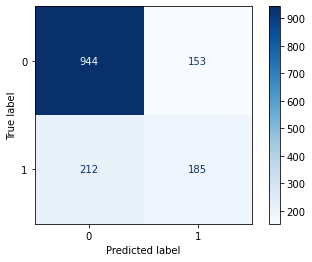

In [302]:
# TEST Sin balance:
fit_test(dt, X_train, y_train)

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1097
           1       0.51      0.49      0.50       397

    accuracy                           0.74      1494
   macro avg       0.67      0.66      0.66      1494
weighted avg       0.74      0.74      0.74      1494

Area bajo la curva ROC: 0.6595
Area bajo la curva Precision-Recall: 0.5665


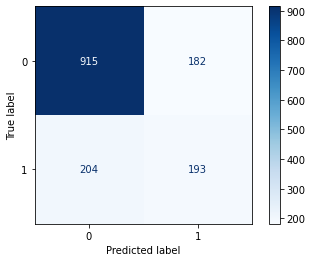

In [303]:
# TEST Oversanmpling:
fit_test(dt, X_train_os, y_train_os)

              precision    recall  f1-score   support

           0       0.88      0.72      0.79      1097
           1       0.49      0.73      0.58       397

    accuracy                           0.72      1494
   macro avg       0.68      0.73      0.69      1494
weighted avg       0.78      0.72      0.74      1494

Area bajo la curva ROC: 0.7261
Area bajo la curva Precision-Recall: 0.6446


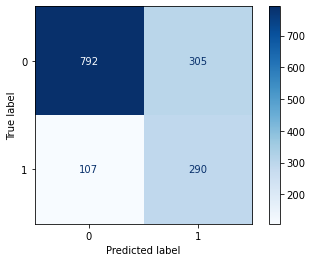

In [304]:
# TEST Undersampling
fit_test(dt, X_train_us, y_train_us)

Vemos que el mejor es el undersampling

## ADA Boost

Analizo con qué método de sampleado funciona mejor.

In [271]:
# Mismo  KFold que el modelo anterior.

from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=5, random_state=41, shuffle=True)  # Los folds

In [272]:
# Mismo árbol del modelo anterior.

from sklearn.tree import DecisionTreeClassifier

# En regresión logítica usa Scaler no se si en arbol tambien se usa.
#scaler=StandardScaler()                  # Siempre estandarizamos.
#X_train_sc=scaler.fit_transform(X_train) # Estandarizamos los datos.   
#X_test_sc=scaler.transform(X_test)       # Recordar solo tranform, ya fiteó arriba.
    
dt = DecisionTreeClassifier(random_state=1)                          # Instancio un simple árbol de clasificación.

In [273]:
# Ensamble:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

ab = AdaBoostClassifier(base_estimator=dt, n_estimators=500, random_state=1)  # Instanciamos boosting. ADA. Estimador base es un árbol de clasificación. Cantidad de pasos 500.

In [274]:
# TRAIN Sin balance:
evaluar_rendimiento(ab, "AdaBoostClassifier", X_train, y_train, cv)          # llamamos a la función para evaluar su rendimiento. Esto sería aplicar Ada a 5 dataset (por el kfold).

Rendimiento de AdaBoostClassifier:	0.455 ± 0.031


In [275]:
# TRAIN Oversampling
evaluar_rendimiento(ab, "AdaBoostClassifier", X_train_os, y_train_os, cv)          # llamamos a la función para evaluar su rendimiento. Esto sería aplicar Ada a 5 dataset (por el kfold).

Rendimiento de AdaBoostClassifier:	0.883 ± 0.01


In [276]:
# Train Undersampling:
evaluar_rendimiento(ab, "AdaBoostClassifier", X_train_us, y_train_us, cv)          # llamamos a la función para evaluar su rendimiento. Esto sería aplicar Ada a 5 dataset (por el kfold).

Rendimiento de AdaBoostClassifier:	0.696 ± 0.012


              precision    recall  f1-score   support

           0       0.79      0.93      0.85      1097
           1       0.62      0.32      0.42       397

    accuracy                           0.77      1494
   macro avg       0.71      0.62      0.64      1494
weighted avg       0.75      0.77      0.74      1494

Area bajo la curva ROC: 0.7366
Area bajo la curva Precision-Recall: 0.5418


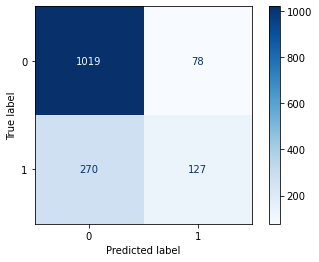

In [305]:
# TEST Sin balance:
fit_test(ab, X_train, y_train)

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1097
           1       0.57      0.38      0.46       397

    accuracy                           0.76      1494
   macro avg       0.69      0.64      0.65      1494
weighted avg       0.74      0.76      0.74      1494

Area bajo la curva ROC: 0.6828
Area bajo la curva Precision-Recall: 0.5071


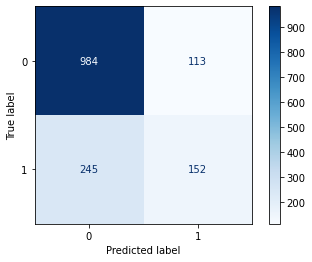

In [306]:
# TEST Oversampling
fit_test(ab, X_train_os, y_train_os)

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1097
           1       0.50      0.77      0.60       397

    accuracy                           0.73      1494
   macro avg       0.70      0.74      0.70      1494
weighted avg       0.79      0.73      0.74      1494

Area bajo la curva ROC: 0.7874
Area bajo la curva Precision-Recall: 0.4938


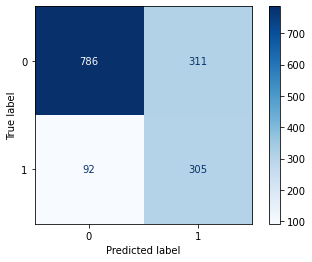

In [307]:
# TEST Undersampling
fit_test(ab, X_train_us, y_train_us)

Vemos nuevamente que el mejor es el undersampling

## Gradient Boosting

In [311]:
gb = GradientBoostingClassifier()                                             # Instanciamos boosting. Gradient. Estimador base es un árbol de clasificación por defecto. Por defecto tiene 100 pasos.

In [281]:
# TRAIN Sin balance
evaluar_rendimiento(gb, "GradientBoostingClassifier", X_train, y_train, cv)   # llamamos a la función para evaluar su rendimiento. Esto sería aplicar Gradient a 5 dataset (por el kfold).

Rendimiento de GradientBoostingClassifier:	0.553 ± 0.03


In [283]:
# TRAIN Oversampling
evaluar_rendimiento(gb, "GradientBoostingClassifier", X_train_os, y_train_os, cv)   # llamamos a la función para evaluar su rendimiento. Esto sería aplicar Gradient a 5 dataset (por el kfold).

Rendimiento de GradientBoostingClassifier:	0.797 ± 0.012


In [284]:
# TRAIN Undersampling
evaluar_rendimiento(gb, "GradientBoostingClassifier", X_train_us, y_train_us, cv)   # llamamos a la función para evaluar su rendimiento. Esto sería aplicar Gradient a 5 dataset (por el kfold).

Rendimiento de GradientBoostingClassifier:	0.763 ± 0.012


              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1097
           1       0.67      0.47      0.55       397

    accuracy                           0.80      1494
   macro avg       0.75      0.69      0.71      1494
weighted avg       0.78      0.80      0.78      1494

Area bajo la curva ROC: 0.8562
Area bajo la curva Precision-Recall: 0.6779


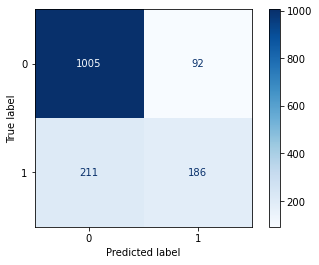

In [313]:
# TEST Sin balance
fit_test(gb, X_train, y_train)

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1097
           1       0.55      0.77      0.64       397

    accuracy                           0.77      1494
   macro avg       0.73      0.77      0.74      1494
weighted avg       0.81      0.77      0.78      1494

Area bajo la curva ROC: 0.8558
Area bajo la curva Precision-Recall: 0.673


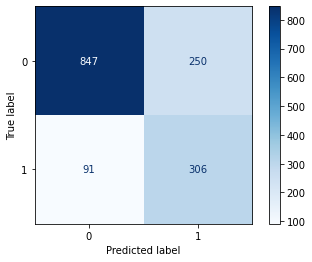

In [316]:
# TEST Oversampling
fit_test(gb, X_train_os, y_train_os)

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1097
           1       0.53      0.83      0.65       397

    accuracy                           0.76      1494
   macro avg       0.73      0.78      0.74      1494
weighted avg       0.82      0.76      0.77      1494

Area bajo la curva ROC: 0.8533
Area bajo la curva Precision-Recall: 0.667


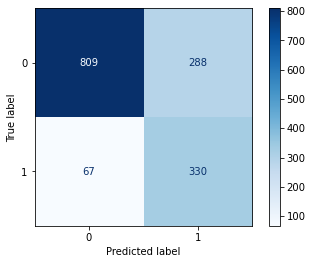

In [317]:
# TEST Undersampling
fit_test(gb, X_train_us, y_train_us)

Vemos nuevamente que el mejor es el undersampling

Este parece ser el mejor modelo, con Undersampling y GradientBoost, veamoslo con un GridSearch:

## GridSearch del mejor modelo = Undersampling + Gradient Boost

In [327]:
from sklearn.model_selection import GridSearchCV

params_gb = {'n_estimators':[500, 1000] , 
             'learning_rate':[0.001, 0.001, 0.1],
             'max_depth' : [1, 2, 3, 4]}                                     # Gradient ya entiende que es un árbol así que pasándolo así ya lo toma.

grid_gb = GridSearchCV(gb, param_grid=params_gb, cv=cv, verbose=1, n_jobs=3) # Instacio GridSearch. Modelo Gradient + parámetros + folds.

In [328]:
grid_gb.fit(X_train_us, y_train_us)  # Entreno el GridSearch.

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   48.7s
[Parallel(n_jobs=3)]: Done 120 out of 120 | elapsed:  2.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=41, shuffle=True),
             estimator=GradientBoostingClassifier(), n_jobs=3,
             param_grid={'learning_rate': [0.001, 0.001, 0.1],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [500, 1000]},
             verbose=1)

In [330]:
grid_gb.best_estimator_

GradientBoostingClassifier(max_depth=1, n_estimators=500)

In [331]:
# TRAIN YA CON EL MEJOR MODELO GRIDSEARCH:
evaluar_rendimiento(grid_gb.best_estimator_, "GradientBoostingClassifier", X_train_us, y_train_us, cv) # llamamos a la función para evaluar su rendimiento. Esto sería aplicar Gradient a 5 dataset (por el kfold).

Rendimiento de GradientBoostingClassifier:	0.769 ± 0.013


              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1097
           1       0.52      0.82      0.64       397

    accuracy                           0.76      1494
   macro avg       0.72      0.78      0.73      1494
weighted avg       0.81      0.76      0.77      1494

Area bajo la curva ROC: 0.8513
Area bajo la curva Precision-Recall: 0.6672


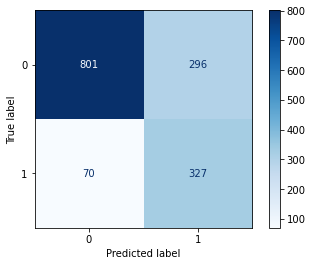

In [332]:
# TEST YA CON EL MEJOR MODELO GRIDSEARCH:
y_pred=grid_gb.predict(X_test)            # Resultado con clase.
y_proba=grid_gb.predict_proba(X_test)     # Resultado con probabilidad de pertenencia a clase.

print(classification_report(y_test, y_pred)) # Vé todas las métricas.
print('Area bajo la curva ROC:', np.round(roc_auc_score(y_test,y_proba[:,1]),4))  # El AUC de curva ROC.
precision, recall, threshold=precision_recall_curve(y_test,y_proba[:,1]);         # Recordar esta otra métrica "Curva P-R".
print('Area bajo la curva Precision-Recall:', np.round(auc(recall, precision),4)) # El AUC de curva P-R.
plot_confusion_matrix(grid_gb, X_test, y_test, cmap='Blues'); # Gráfico de la matriz de confusión.

---
## Feature Importance

Veamos la importancia de los features del mejor modelo GridSearch.

In [336]:
# Mejor modelo del GridSeach
model = grid_gb.best_estimator_

# Features importance
importances = model.feature_importances_
importances

array([3.37218321e-02, 1.95602775e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.06630485e-03, 0.00000000e+00, 2.12495702e-03, 0.00000000e+00,
       0.00000000e+00, 5.42164923e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.39021777e-04, 2.29429493e-04, 0.00000000e+00,
       9.93469749e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.78522972e-04, 2.02072839e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.75924817e-03, 0.00000000e+00,
       9.60900480e-05, 3.58464288e-03, 0.00000000e+00, 8.60121208e-04,
       0.00000000e+00, 1.16916342e-03, 1.06568648e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.94387127e-04, 0.00000000e+00,
       0.00000000e+00, 3.16715744e-03, 1.98754476e-03, 0.00000000e+00,
      

In [340]:
X=df_dummy.drop(['Churn_YES'], axis=1)

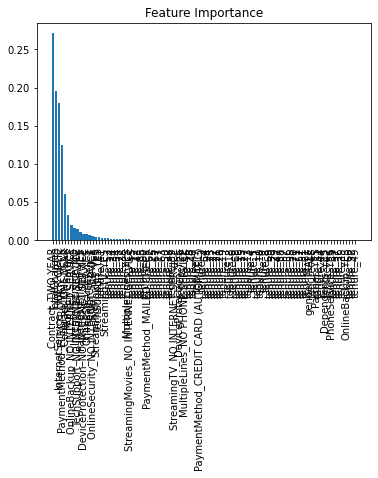

In [341]:
# Recordamos que argsort nos devuelve un vector con indices del vector original tal que este quede reordenado de mayor a menor. https://numpy.org/doc/stable/reference/generated/numpy.argsort.html

# Creamos una variable que tenga los indices indicando los valores de mayor a menor
indices = np.argsort(importances)[::-1]

# Con dicha variable realizamos fancy indexing de manera de ordenar los labels del eje x.
names = X.columns[indices]

# Creamos el plot
plt.figure()

# Creamos plot title
plt.title("Feature Importance")

# Agregamos las barras
plt.bar(range(X.shape[1]), importances[indices])

# Agregamos los feature names 
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

---
## Pipeline

In [ ]:
#(i) Crear la clase para seleccionar las features:

from sklearn.base import BaseEstimator, TransformerMixin

class FeatureSelection(BaseEstimator, TransformerMixin):
    
    def __init__(self, selected_features):
        self.selected_features=selected_features
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.selected_features]

In [ ]:
#(ii) Armar los pasos para el Pipeline e instancia el Pipeline from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import numpy as np

In [ ]:
selector=FeatureSelection(selected_features=X_train.columns.values)
#selector_1=FeatureSelection(selected_features=X.drop(columns='Rainfall').columns.values)
#selector_2=FeatureSelection(selected_features=X.drop(columns='Sunshine').columns.values)


In [ ]:
#(iii) Generar la grilla y aplicar GridSearchCV con la LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # kfolds

In [ ]:
# RandomSearch con dos estimadores: KNN y LOGISTIC -> CORRIO EN 20 MIN

# Valores por defecto de los pasos:
pasos = [('feature_engineering', selector),
         ('preprocesamiento', MinMaxScaler()),
         ('clasificador', LogisticRegression(solver='sag'))]

pipe = Pipeline(pasos) # Instancio Pipline.

# Grilla de Pipeline:
param_grid = [{'feature_engineering':[selector],
               'preprocesamiento': [StandardScaler(), MinMaxScaler()],
               'clasificador__C': [0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 1, 5, 10, 50]},
              {'feature_engineering':[selector],
               'preprocesamiento':[StandardScaler(), MinMaxScaler()],
               'clasificador': [KNeighborsClassifier()],
               'clasificador__n_neighbors':range(2,20,2),'clasificador__weights':['uniform','distance']}]

model = RandomizedSearchCV(pipe, param_grid, cv= folds, scoring= 'f1_macro', random_state= 10)

model.fit(X_train, y_train)